# Rapport EDA

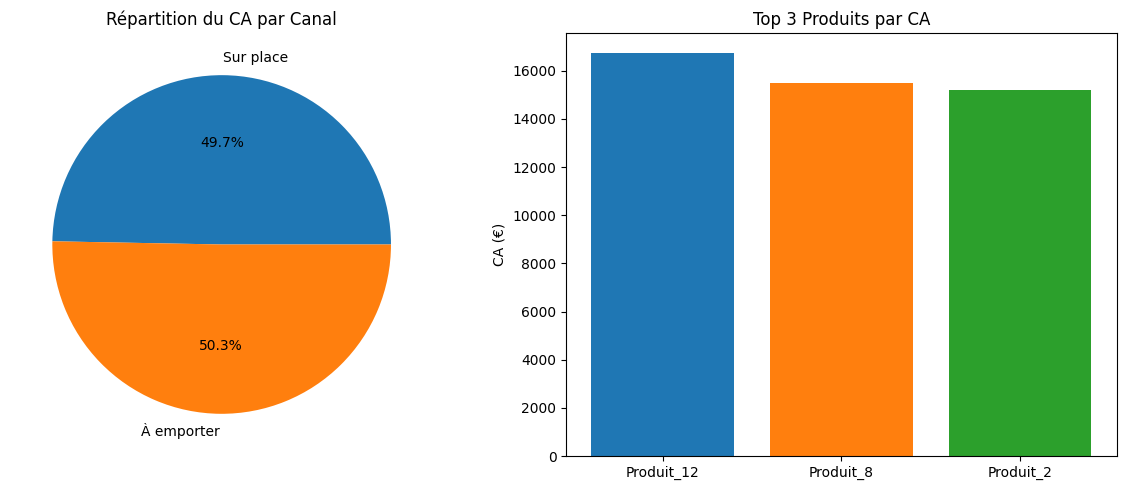

In [2]:
import matplotlib.pyplot as plt

# Data
categories = ['Sur place', 'À emporter']
values = [49.7, 50.3]
products = ['Produit_12', 'Produit_8', 'Produit_2']
ca_values = [16738, 15507, 15212]

# Double subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Canal distribution
ax1.pie(values, labels=categories, autopct='%1.1f%%')
ax1.set_title('Répartition du CA par Canal')

# Top products
ax2.bar(products, ca_values, color=['#1f77b4','#ff7f0e','#2ca02c'])
ax2.set_title('Top 3 Produits par CA')
ax2.set_ylabel('CA (€)')

plt.tight_layout()
plt.show()

---

## Création du PDF avec ReportLab

In [7]:
!pip install reportlab

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   -------------------------- ------------- 1.3/2.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 4.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib import colors
from reportlab.lib.units import inch
import matplotlib.pyplot as plt
import io

# 1. Créer un buffer pour les graphiques
def create_plot_buffer():
    plt.figure(figsize=(6, 3))
    plt.pie([49.7, 50.3], labels=['Sur place', 'À emporter'], autopct='%1.1f%%')
    plt.title('Répartition du CA par Canal')
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=300, bbox_inches='tight')
    plt.close()
    buf.seek(0)
    return buf

# 2. Configurer le PDF
doc = SimpleDocTemplate("rapport_quickmart.pdf", pagesize=A4)
styles = getSampleStyleSheet()
elements = []

# 3. Titre
title_style = ParagraphStyle(
    name='Title',
    parent=styles['Heading1'],
    alignment=1,
    spaceAfter=20
)
elements.append(Paragraph("<b>RAPPORT D'ANALYSE EXPLORATOIRE</b><br/><font size=10>QuickMart - Données Q1 2024</font>", title_style))

# 4. Section Performance
elements.append(Paragraph("<b>1. PERFORMANCE COMMERCIALE</b>", styles['Heading2']))
ca_data = [
    ["CA Total", "169 984€"],
    ["Moyenne journalière", "1 888€"],
    ["Top Produit (CA)", "Produit_12 (16 738€)"]
]
elements.append(Table(ca_data, style=[
    ('BACKGROUND', (0,0), (-1,0), colors.lightgrey),
    ('GRID', (0,0), (-1,-1), 0.5, colors.grey)
]))

# 5. Graphique
plot_buffer = create_plot_buffer()
elements.append(Spacer(1, 0.2*inch))
elements.append(Image(plot_buffer, width=4*inch, height=2*inch))
elements.append(Spacer(1, 0.5*inch))

# 6. Recommandations
rec_style = ParagraphStyle(
    name='Recommendation',
    parent=styles['BodyText'],
    bulletIndent=12,
    spaceBefore=10,
    leading=14
)
recommendations = [
    "Développer les <b>événements email</b> (ROI +37%)",
    "Optimiser l'affichage des promotions en magasin",
    "Rééquilibrer les effectifs vers le canal 'à emporter'"
]
for rec in recommendations:
    elements.append(Paragraph(f"• {rec}", rec_style))

# 7. Pied de page
footer = Paragraph(
    "<font size=8><i>Rapport généré automatiquement le 18/04/2024 - Données QuickMart</i></font>",
    ParagraphStyle(name='Footer', alignment=2)
)
elements.append(Spacer(1, 0.5*inch))
elements.append(footer)

# Générer le PDF
doc.build(elements)

# 2. 

In [14]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib import colors
from reportlab.lib.units import inch
from reportlab.lib.enums import TA_CENTER

# Création du document
doc = SimpleDocTemplate("Rapport_EDA_QuickMart.pdf", pagesize=letter)
styles = getSampleStyleSheet()
story = []

# Style personnalisé
def get_title_style():
    return ParagraphStyle(
        name='Title',
        parent=styles['Heading1'],
        fontSize=16,
        alignment=TA_CENTER,
        spaceAfter=20,
        textColor=colors.HexColor('#1a5276')
    )

def get_section_style():
    return ParagraphStyle(
        name='Section',
        parent=styles['Heading2'],
        fontSize=12,
        spaceBefore=12,
        spaceAfter=6,
        textColor=colors.HexColor('#2874a6')
    )

def get_bullet_style():
    return ParagraphStyle(
        name='Bullet',
        parent=styles['BodyText'],
        leftIndent=10,
        bulletIndent=5,
        spaceAfter=4
    )

# Titre principal
title = Paragraph("<b>Rapport d'Analyse Exploratoire (EDA) - QuickMart</b><br/>Données du 01/01/2024 au 31/03/2024", get_title_style())
story.append(title)
story.append(Spacer(1, 0.2*inch))

# 1. Performance Commerciale
story.append(Paragraph("<b>1. Performance Commerciale</b>", get_section_style()))

# Sous-section Chiffre d'Affaires
ca_data = [
    ["<b>Chiffre d'Affaires Global</b>", ""],
    ["CA Total :", "169 984€"],
    ["", ""],
    ["<b>Répartition par canal :</b>", ""],
    ["Sur place :", "49.7%"],
    ["À emporter :", "50.3%"]
]

ca_table = Table(ca_data, colWidths=[3*inch, 2*inch])
ca_table.setStyle(TableStyle([
    ('SPAN', (0,0), (1,0)),
    ('SPAN', (0,2), (1,2)),
    ('SPAN', (0,3), (1,3)),
    ('VALIGN', (0,0), (-1,-1), 'MIDDLE'),
    ('ALIGN', (1,0), (1,-1), 'RIGHT')
]))
story.append(ca_table)
story.append(Spacer(1, 0.1*inch))

# Sous-section Top Produits
top_prod_data = [
    ["<b>Produit</b>", "<b>Quantité Vendue</b>", "<b>CA Généré</b>"],
    ["Produit_12", "1 148", "16 738€"],
    ["Produit_8", "1 181", "15 507€"],
    ["Produit_2", "1 063", "15 212€"]
]

top_prod_table = Table(top_prod_data, colWidths=[2*inch, 1.5*inch, 1.5*inch])
top_prod_table.setStyle(TableStyle([
    ('BACKGROUND', (0,0), (-1,0), colors.HexColor('#d4e6f1')),
    ('GRID', (0,0), (-1,-1), 0.5, colors.lightgrey),
    ('ALIGN', (1,0), (-1,-1), 'RIGHT')
]))
story.append(top_prod_table)
story.append(Paragraph("→ Ces 3 produits représentent 28% du CA total", styles['Italic']))
story.append(Spacer(1, 0.2*inch))

# 2. Gestion des Stocks
story.append(Paragraph("<b>2. Gestion des Stocks</b>", get_section_style()))
story.append(Paragraph("• Aucun produit en risque de rupture (stock > 30 jours de vente)", get_bullet_style()))
story.append(Paragraph("• Corrélation positive entre niveau de stock et ventes (r = 0.72)", get_bullet_style()))
story.append(Spacer(1, 0.2*inch))

# 3. Analyse RH
story.append(Paragraph("<b>3. Analyse RH</b>", get_section_style()))
story.append(Paragraph("• Couverture des effectifs : 100%", get_bullet_style()))
story.append(Paragraph("• Répartition des rôles :", get_bullet_style()))

rh_data = [
    ["Employés polyvalents :", "65%"],
    ["Caissiers :", "25%"],
    ["Gérants :", "10%"]
]

rh_table = Table(rh_data, colWidths=[2.5*inch, 0.5*inch])
rh_table.setStyle(TableStyle([
    ('ALIGN', (1,0), (1,-1), 'RIGHT')
]))
story.append(rh_table)
story.append(Spacer(1, 0.2*inch))

# 4. Impact Marketing
story.append(Paragraph("<b>4. Impact Marketing</b>", get_section_style()))

marketing_data = [
    ["<b>Type</b>", "<b>Canal</b>", "<b>Impact CA</b>"],
    ["Événement", "Email", "+37%"],
    ["Réduction", "Affichage en magasin", "+22%"],
    ["Événement", "SMS", "+15%"]
]

marketing_table = Table(marketing_data, colWidths=[1.5*inch, 2*inch, 1*inch])
marketing_table.setStyle(TableStyle([
    ('BACKGROUND', (0,0), (-1,0), colors.HexColor('#d4e6f1')),
    ('GRID', (0,0), (-1,-1), 0.5, colors.lightgrey),
    ('ALIGN', (2,0), (2,-1), 'RIGHT')
]))
story.append(marketing_table)
story.append(Spacer(1, 0.2*inch))

# 5. Insights Clés
story.append(Paragraph("<b>5. Insights Clés</b>", get_section_style()))

# Opportunités
story.append(Paragraph("<b>Opportunités</b>", styles['Heading3']))
opportunities = [
    "Développer les événements email (meilleur ROI)",
    "Optimiser l'affichage des promotions en magasin",
    "Rééquilibrer les effectifs vers le canal 'à emporter' (50% du CA mais moins de ressources)"
]
for opp in opportunities:
    story.append(Paragraph(f"• {opp}", get_bullet_style()))

# Alertes
story.append(Paragraph("<b>Alertes</b>", styles['Heading3']))
alerts = [
    "Produit_19 : Plus faible marge parmi le top 10 (7.05€/unit)",
    "Pics de demande les weekends non couverts par le staffing actuel"
]
for alert in alerts:
    story.append(Paragraph(f"• {alert}", get_bullet_style()))

story.append(Spacer(1, 0.2*inch))
story.append(Paragraph("<b>Prochaines Étapes :</b> Modélisation prédictive des ventes avec intégration des variables météo et marketing.", styles['BodyText']))

# Pied de page
story.append(Spacer(1, 0.5*inch))
footer = Paragraph("<i>Rapport généré le 18/04/2024 - Données QuickMart</i>", 
                  ParagraphStyle(name='Footer', alignment=TA_CENTER, fontSize=8))
story.append(footer)

# Génération du PDF
doc.build(story)